In [230]:
%matplotlib inline

In [231]:
import os 
# Ścieżka dostępu do katalogu
os.chdir("D:\Dane")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves
plt.style.use('ggplot')

In [232]:
# Wczytywanie pliku cvs
df = pd.read_csv("Immunotherapy.csv")
df

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
5,1,15,5.00,3,3,84,7,1
6,1,35,9.75,2,2,8,6,1
7,2,28,7.50,4,1,9,2,1
8,2,19,6.00,2,1,225,8,1
9,2,32,12.00,6,3,35,5,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
sex                    90 non-null int64
age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
induration_diameter    90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(7)
memory usage: 5.7 KB


In [234]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [235]:
df.describe()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.230556,6.144444,1.711111,95.700000,14.333333,0.788889
std,0.500811,12.235435,3.098166,4.212238,0.824409,136.614643,17.217707,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


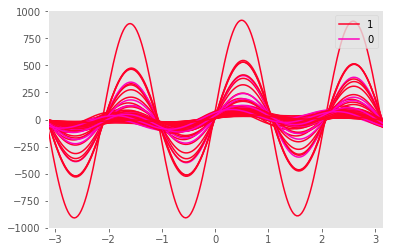

In [236]:
from matplotlib import cm
andrews_curves(df, 'Result_of_Treatment', colormap='gist_rainbow');

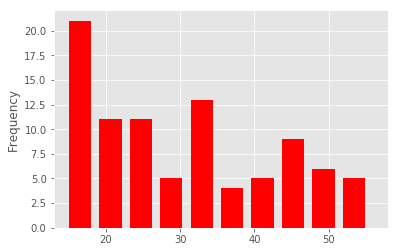

In [274]:
df.age.plot('hist', width =3,color ='red');

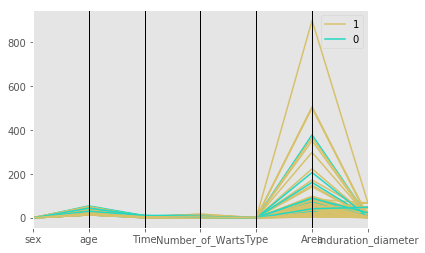

In [237]:
plt.figure()
parallel_coordinates(df, 'Result_of_Treatment');

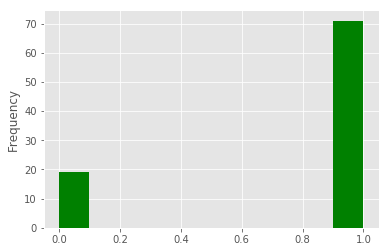

In [239]:
df.Result_of_Treatment.plot('hist',color ='green')
plt.show()

In [238]:
# Transformacja danych
df = df.apply(pd.to_numeric)
df_array = df.as_matrix()

In [240]:
X = t_array[:,:7]
y = t_array[:,7]

In [241]:
# Podział zbioru danych na podzbiory X oraz y (atrybuty, klasy)
X_train, X_test, y_train, y_test = train_test_split(df_array[:,:7],
                                                    df_array[:,7],
test_size=0.2)

# MLP Klasyfikator

 Budowanie oraz uczenie modelu na danych uczących (Wielowarstwowy model perceptronowy z jedną ukrytą warstwą)

 Wejsciowa warstwa: 7 neuronów(7 atrybutów) 

Jedna ukryta warstwa

Wyjściowa warstwa z 2 neuronów,reprezentujących klasy Result_of_Treatment[1,0]

In [242]:
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init=0.01,max_iter=500)


In [243]:
# Uczenia modelu 
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [244]:
#Ocena poprawnosci klasyfikatora
mlp_accuracy = mlp.score(X_test, y_test)
print(mlp_accuracy)

0.7777777777777778


In [245]:
#Predykcja
print (mlp.predict(X_test))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [246]:
test = test.apply(pd.to_numeric)
t_array = test.as_matrix()

In [247]:
print (mlp.predict(t_array[:,:7]))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


# KNN klasyfikator

In [248]:
# Ilość n-sąsiadów = 8
knn = KNeighborsClassifier(n_neighbors=8)

In [249]:
# Uczenie knn-modelu klasyfikatora
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [250]:
# Predykcja
knn_pred = knn.predict(X_test)

In [251]:
print("Test set prediction:\n {}".format(knn_pred))

Test set prediction:
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [252]:
# Ocena poprawności klasyfikacji
knn_accuracy = knn.score(X_test, y_test)
print(knn_accuracy)

0.7222222222222222


# Drzewo decyzyjne

In [253]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Tworzenie macierzy
matrix= confusion_matrix(y_test, tree_predictions)

In [254]:
# Ocena poprawności klasyfikacji
dd_accuracy = tree_model.score(X_test, y_test)
print(dd_accuracy)

0.8888888888888888


# GaussianNB

In [255]:
# Uczenia modelu GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [256]:
# Predykcja
nb_predictions = nb.predict(X_test)

In [257]:
# Ocena poprawności klasyfikacji
nb_accuracy = gnb.score(X_test, y_test)

# Tworzenia macierzy
cm = confusion_matrix(y_test, gnb_predictions)

In [258]:
print(nb_accuracy)

0.6666666666666666


In [259]:
nb_predictions

array([1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1.])

# SVM Klasyfikator

In [260]:
# Uczenia modelu SVM
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [261]:
# Predykcja 
svm_predictions = svm_model_linear.predict(X_test)

In [262]:
# Ocena poprawności klasyfikacj
svm_accuracy = svm_model_linear.score(X_test, y_test)

In [263]:
# Tworzenia macierzy
cm = confusion_matrix(y_test, svm_predictions)

In [264]:
svm_accuracy

0.8333333333333334

# Ocena dokładności klasyfikacji

In [265]:
# Illustracja wyników 
acc_mlp = [svm_accuracy, 0, 0, 0, 0]
acc_knn = [0, knn_accuracy, 0, 0,0]
acc_dd= [0, 0, dd_accuracy, 0, 0]
acc_nb = [0, 0, 0, NB_accuracy, 0]
acc_svm =[0, 0, 0, 0, mlp_accuracy]

algorytmy = ['MLP','KNN','Dzrewo decyzji','NB','SVN']
# Zamiana danych tekstowych na liczby
y_int = np.arange(len(lab))
y_int

array([0, 1, 2, 3, 4])

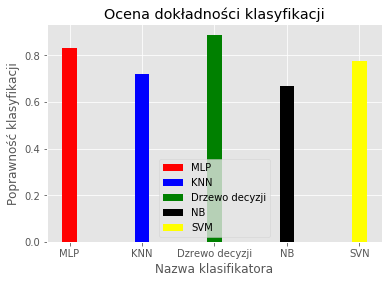

In [266]:
plt.xticks(y_int, algorytmy)
plt.ylabel("Poprawność klasyfikacji")
plt.xlabel("Nazwa klasifikatora")
plt.title("Ocena dokładności klasyfikacji")

plt.bar(y_int, acc_mlp, width =0.2, label= "MLP", color ='red');
plt.bar(y_int, acc_knn, width =0.2, label= "KNN", color ='blue');
plt.bar(y_int, acc_dd, width =0.2, label= "Drzewo decyzji", color ='green');
plt.bar(y_int, acc_nb, width =0.2, label= "NB", color ='black');
plt.bar(y_int, acc_svm, width =0.2, label= "SVM", color ='yellow');

plt.legend();

# Ocena blędu klasyfikacji

In [267]:
acc_mlp = [1-svm_accuracy, 0, 0, 0, 0]
acc_knn = [0, 1-knn_accuracy, 0, 0,0]
acc_dd= [0, 0, 1-dd_accuracy, 0, 0]
acc_nb = [0, 0, 0, 1-NB_accuracy, 0]
acc_svm =[0, 0, 0, 0, 1-mlp_accuracy]

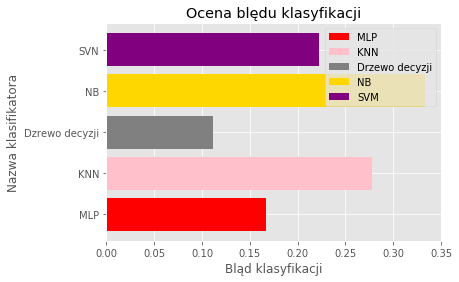

In [268]:
plt.yticks(y_int, algorytmy)
plt.xlabel("Bląd klasyfikacji")
plt.ylabel("Nazwa klasifikatora")
plt.title("Ocena blędu klasyfikacji")

plt.barh(y_int, acc_mlp, label= "MLP", color ='red');
plt.barh(y_int, acc_knn, label= "KNN", color ='pink');
plt.barh(y_int, acc_dd, label= "Drzewo decyzji", color ='grey');
plt.barh(y_int, acc_nb, label= "NB", color ='gold');
plt.barh(y_int, acc_svm, label= "SVM", color ='purple');

plt.legend();